# Classification of Handwritten Digits

** Description about MNIST data **

MNIST data is a set of 70,000 small images of handwritten digits by students and employees. Each data point represents a set of labelled images represnting a digit. MNIST is the most studied dataset for a classification model.

** Getting the MNIST data set **

sklearn has modules to download wellknown datasets including MNIST data set

In [1]:
from sklearn.datasets import fetch_mldata
import seaborn as sns

In [2]:
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

Dataset from sklearn usually has dictionary datastructure where'DESCR' key has Description as a value, 'COL_NAMES' has column names as a value, 'data'has array of features and data points as values and 'target' has labels.

In [3]:
X = mnist['data']
y = mnist['target']
y

array([ 0.,  0.,  0., ...,  9.,  9.,  9.])

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
y = y.reshape(70000,1)

In [7]:
y.shape

(70000, 1)

**Let us analyze the data by converting the data into data frames**


In [8]:
import pandas as pd
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)

Analyzing input data: Input data has 784 features representing 28*28 pixel of each datapoint.
There are about 7000 such datapoints meaning 7000 images. Each feature has values from 0 to 255, 0 representing white & 255 representing black

In [9]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, 0 to 783
dtypes: uint8(784)
memory usage: 52.3 MB


In [10]:
X_df.describe()

0        1        2        3        4        5        6        7    \
count  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0   
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
50%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
75%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
max        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

           8        9     ...              774           775           776  \
count  70000.0  70000.0   ...     70000.000000  70000.000000  70000.000000   
mean       0.0      0.0   ...         0.197414      0.099543      0.046629   
std        0.0      0.0   ...         5.991206      4.256304      2.783732   
min        0.0      0.0   ...         0.000000      0.000000      0.000000   
25%        0.0      0.0   ...         0.000000      0.000000      0.000000   
50%        0.0      0.0   ...         0.000000      0.000000      0.000000   
75%        0.0      0.0   ...         0.000000      0.000000      0.000000   
max        0.0      0.0   ...       254.000000    254.000000    253.000000   

                777           778           779      780      781      782  \
count  70000.000000  70000.000000  70000.000000  70000.0  70000.0  70000.0   
mean       0.016614      0.012957      0.001714      0.0      0.0      0.0   
std        1.561822      1.553796      0.320889      0.0      0.0      0.0   
min        0.000000      0.000000      0.000000      0.0      0.0      0.0   
25%        0.000000      0.000000      0.000000      0.0      0.0      0.0   
50%        0.000000      0.000000      0.000000      0.0      0.0      0.0   
75%        0.000000      0.000000      0.000000      0.0      0.0      0.0   
max      253.000000    254.000000     62.000000      0.0      0.0      0.0   

           783  
count  70000.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0  

[8 rows x 784 columns]

Analyzing labels: output labels has 7000 datapoints each having vales from 0 to 9 representing digits.

In [11]:
y_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 1 columns):
0    70000 non-null float64
dtypes: float64(1)
memory usage: 547.0 KB


In [12]:
y_df.describe()

0
count  70000.000000
mean       4.452429
std        2.890195
min        0.000000
25%        2.000000
50%        4.000000
75%        7.000000
max        9.000000

** Getting data from yann lecunn dataset** 

Yann Lecunn dataset is of the format idx and split across 4 files
1. train-images.idx3-ubyte : training image set which consists of 60000 images each image is represented by a 28*28 array
2. train-labels.idx1-ubyte : training label set which consists of 60000 labels 
3. t10k-images.idx3-ubyte : test image set which consists of 10000 images each image is represented by a 28*28
4. t10k-labels.idx1-ubyte : training label set which consists of 10000 labels

In [3]:
import idx2numpy

**Extract Training data**

In [4]:
X_train_3D = idx2numpy.convert_from_file('train-images.idx3-ubyte')
X_train = X_train_3D.flatten().reshape(60000,784)

y_train = idx2numpy.convert_from_file('train-labels.idx1-ubyte')

In [5]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [6]:
X_train.shape

(60000, 784)

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
y_train.shape

(60000,)

**Extract Test data**

In [9]:
X_test_3D = idx2numpy.convert_from_file('t10k-images.idx3-ubyte')
X_test =  X_test_3D.flatten().reshape(10000,784)

y_test = idx2numpy.convert_from_file('t10k-labels.idx1-ubyte')

In [10]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [11]:
X_test.shape

(10000, 784)

In [12]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [13]:
y_test.shape

(10000,)

**Function to display a digit image from one 1-d representation of pixels**

In [14]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

def display(image,label):
    """image is a 1*784 numpy array"""
   
    image = image.reshape(28,28)
    sns.heatmap(image,linewidth=0,xticklabels=False,yticklabels=False)
    #plt.imshow(image, cmap = plt.cm.gray_r, interpolation="nearest")
    plt.title("Image Representation for %d" %(label))
    plt.show()

**Displaying a set of digits **

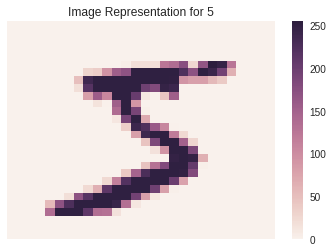

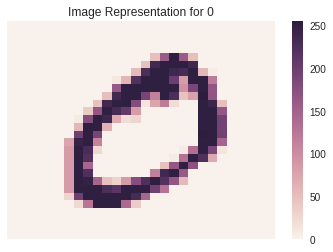

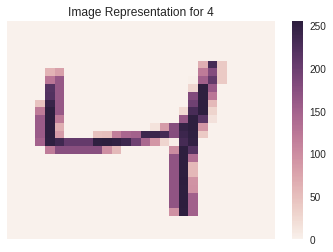

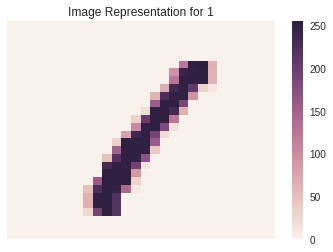

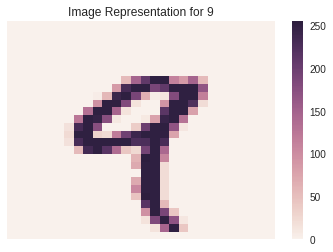

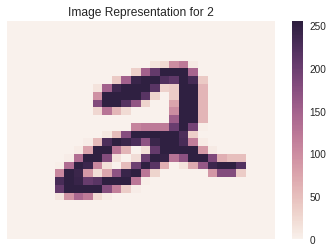

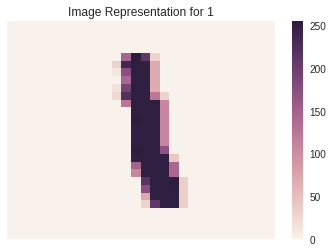

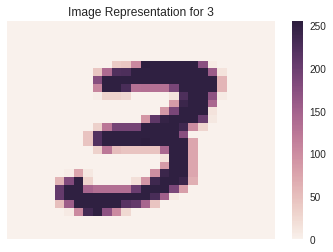

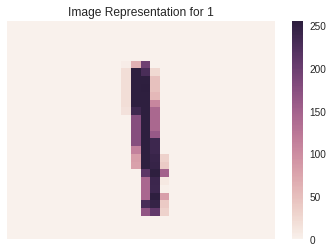

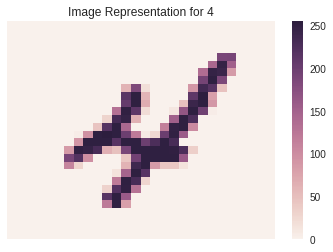

In [25]:
for i in range(10):
    display(X_train[i],y_train[i])

** One Hidden Layer Neural Network with #Epochs=15**

In [15]:
import tensorflow
import keras
import numpy as np
import pandas as pd

from keras.models import Sequential#initialize ann
from keras.layers import Dense#add diff layers in ann


Using TensorFlow backend.


** Normalize the input set to be between 0 to 1 **

In [16]:
X_train_norm = X_train/255
X_test_norm = X_test/255
X_test_norm

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

**Use One hot encoding for the y to convert it to a binary matrix** 

In [22]:
from keras.utils import np_utils
y_train_norm = np_utils.to_categorical(y_train)
y_test_norm = np_utils.to_categorical(y_test)

**Initialize Neural Network**

In [31]:
classifier = Sequential()

**Add input layer & Hidden layer **


In [32]:
#classifier.add(Dense(output_dim=397,init='uniform',activation='relu',input_dim=784))
classifier.add(Dense(activation="relu",input_dim=784,units=397,kernel_initializer="uniform"))
#number of nodes in the hidden layer = avg(INNPUTLAYER + OUTPUTLAYER)
#classifier.add(Dense(activation="relu",units=397,kernel_initializer="uniform"))


In [33]:
#Adding output layer
classifier.add(Dense(activation="softmax",units=10,kernel_initializer="uniform"))


In [34]:
classifier.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [35]:
hist = classifier.fit(X_train_norm,y_train_norm,batch_size=250,epochs=15,verbose=1, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/15
42000/42000 [==============================] - 19s 460us/step - loss: 0.4769 - acc: 0.8762 - val_loss: 0.2517 - val_acc: 0.9283
Epoch 2/15
42000/42000 [==============================] - 19s 450us/step - loss: 0.2087 - acc: 0.9400 - val_loss: 0.1865 - val_acc: 0.9476
Epoch 3/15
42000/42000 [==============================] - 19s 451us/step - loss: 0.1496 - acc: 0.9568 - val_loss: 0.1525 - val_acc: 0.9574
Epoch 4/15
42000/42000 [==============================] - 19s 464us/step - loss: 0.1148 - acc: 0.9669 - val_loss: 0.1339 - val_acc: 0.9611
Epoch 5/15
42000/42000 [==============================] - 19s 460us/step - loss: 0.0929 - acc: 0.9733 - val_loss: 0.1155 - val_acc: 0.9668
Epoch 6/15
42000/42000 [==============================] - 19s 457us/step - loss: 0.0737 - acc: 0.9795 - val_loss: 0.1096 - val_acc: 0.9674
Epoch 7/15
42000/42000 [==============================] - 19s 459us/step - loss: 0.0609 - acc: 0.9827 - val_loss: 0.

In [36]:
training_accuracy = hist.history["acc"]
training_loss = hist.history["loss"]
cross_val_accuracy = hist.history["val_acc"]
cross_val_loss = hist.history["val_loss"]

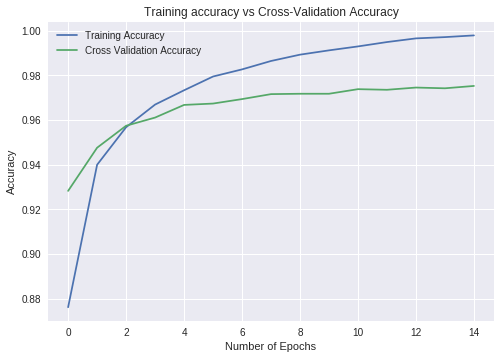

In [37]:
sns.set(style="darkgrid")
x_epoch = range(15)
plt.plot(x_epoch,training_accuracy)
plt.plot(x_epoch,cross_val_accuracy)
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training accuracy vs Cross-Validation Accuracy")
plt.legend(["Training Accuracy","Cross Validation Accuracy"])

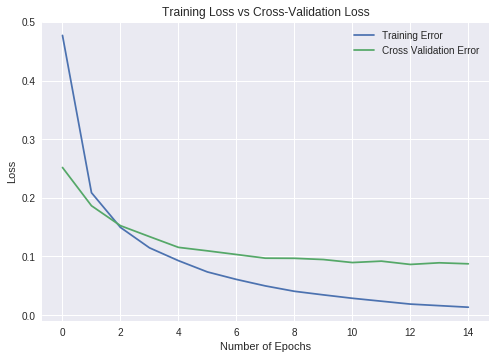

In [38]:
plt.plot(x_epoch,training_loss)
plt.plot(x_epoch,cross_val_loss)
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Cross-Validation Loss")
plt.legend(["Training Error","Cross Validation Error"])

In [39]:
test_loss, test_accuracy= classifier.evaluate(X_test_norm,y_test_norm,batch_size=100)
test_loss

10000/10000 [==============================] - 2s 200us/step


0.072839474490792783

In [40]:
test_accuracy

0.97890000343322758

In [41]:
y_test_pred = classifier.predict(X_test_norm)
y_test_pred = list(map(lambda i: np.argmax(i),y_test_pred))
y_test_pred

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 2,
 4,
 2,


**Plot Confusion Matrix against Test data**

In [42]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, y_test_pred)
confusionMatrix

array([[ 974,    0,    1,    2,    0,    1,    0,    1,    1,    0],
       [   0, 1124,    4,    0,    0,    1,    2,    1,    3,    0],
       [   3,    1, 1014,    2,    1,    0,    2,    6,    3,    0],
       [   1,    0,    3,  992,    0,    2,    0,    5,    3,    4],
       [   1,    0,    2,    1,  964,    0,    3,    3,    2,    6],
       [   2,    0,    0,    9,    2,  863,    6,    2,    5,    3],
       [   6,    3,    2,    1,    2,    3,  938,    0,    3,    0],
       [   1,    4,    8,    4,    0,    0,    0, 1008,    0,    3],
       [   5,    0,    5,    8,    4,    3,    2,    6,  938,    3],
       [   3,    3,    0,    7,    9,    3,    0,    7,    3,  974]])

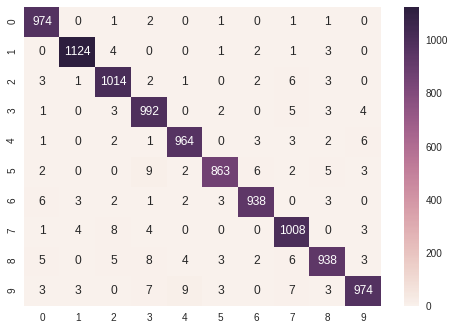

In [43]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [44]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

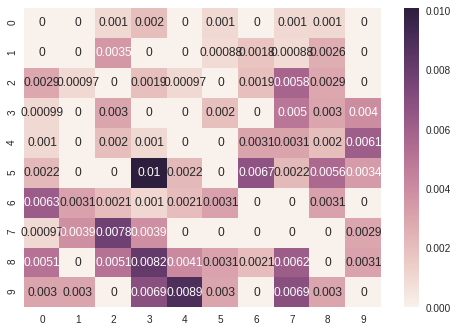

In [45]:
np.fill_diagonal(norm_conf_mx, 0)
ax = sns.heatmap(norm_conf_mx,annot=True)

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.97889999999999999

**One Hidden Layer Neural Network with #Epochs=3**

**Initialize Neural Network**

In [47]:
classifier = Sequential()

**Add input layer & Hidden layer **


In [48]:
#classifier.add(Dense(output_dim=397,init='uniform',activation='relu',input_dim=784))
classifier.add(Dense(activation="relu",input_dim=784,units=397,kernel_initializer="uniform"))
#number of nodes in the hidden layer = avg(INNPUTLAYER + OUTPUTLAYER)
#classifier.add(Dense(activation="relu",units=397,kernel_initializer="uniform"))


In [49]:
#Adding output layer
classifier.add(Dense(activation="softmax",units=10,kernel_initializer="uniform"))


In [50]:
classifier.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [51]:
hist = classifier.fit(X_train_norm,y_train_norm,batch_size=250,epochs=3,verbose=1, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/3
42000/42000 [==============================] - 18s 424us/step - loss: 0.4871 - acc: 0.8752 - val_loss: 0.2562 - val_acc: 0.9268
Epoch 2/3
42000/42000 [==============================] - 18s 421us/step - loss: 0.2104 - acc: 0.9403 - val_loss: 0.1855 - val_acc: 0.9473
Epoch 3/3
42000/42000 [==============================] - 18s 419us/step - loss: 0.1488 - acc: 0.9579 - val_loss: 0.1489 - val_acc: 0.9566


In [52]:
training_accuracy = hist.history["acc"]
training_loss = hist.history["loss"]
cross_val_accuracy = hist.history["val_acc"]
cross_val_loss = hist.history["val_loss"]

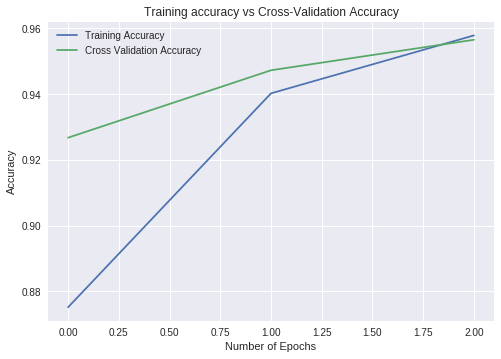

In [53]:
sns.set(style="darkgrid")
x_epoch = range(3)
plt.plot(x_epoch,training_accuracy)
plt.plot(x_epoch,cross_val_accuracy)
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training accuracy vs Cross-Validation Accuracy")
plt.legend(["Training Accuracy","Cross Validation Accuracy"])

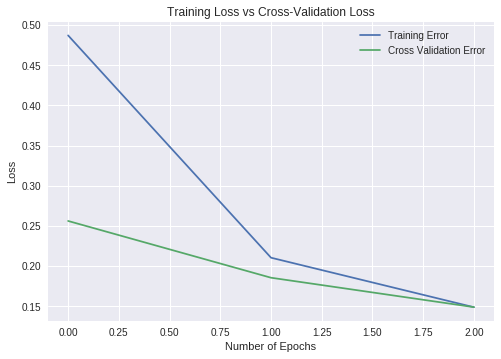

In [54]:
plt.plot(x_epoch,training_loss)
plt.plot(x_epoch,cross_val_loss)
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Cross-Validation Loss")
plt.legend(["Training Error","Cross Validation Error"])

In [55]:
test_loss, test_accuracy= classifier.evaluate(X_test_norm,y_test_norm,batch_size=100)
test_loss

10000/10000 [==============================] - 2s 208us/step


0.13299489144235849

In [56]:
test_accuracy

0.95980000376701358

In [57]:
y_test_pred = classifier.predict(X_test_norm)
y_test_pred = list(map(lambda i: np.argmax(i),y_test_pred))
y_test_pred

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 6,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 7,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 8,
 8,
 7,
 2,
 3,
 0,
 2,
 4,
 2,


**Plot Confusion Matrix against Test data**

In [58]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, y_test_pred)
confusionMatrix

array([[ 964,    0,    0,    1,    0,    3,    9,    1,    1,    1],
       [   0, 1112,    4,    1,    1,    1,    4,    1,   11,    0],
       [   5,    1,  997,    1,    7,    1,    4,    5,   10,    1],
       [   0,    0,   16,  948,    1,   17,    0,   10,   14,    4],
       [   1,    0,    4,    0,  950,    0,    7,    2,    3,   15],
       [   7,    1,    1,    6,    3,  848,   13,    0,    9,    4],
       [   5,    3,    0,    1,    8,    4,  932,    0,    5,    0],
       [   1,    5,   17,    6,    4,    1,    0,  979,    1,   14],
       [   4,    2,    6,    9,    5,    4,    9,   10,  920,    5],
       [   4,    6,    2,    9,   23,    4,    1,    6,    6,  948]])

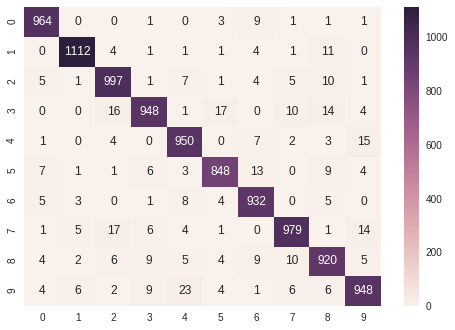

In [59]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [60]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

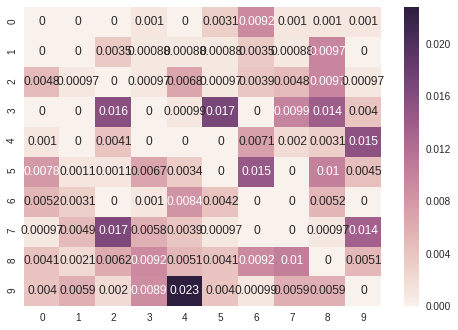

In [61]:
np.fill_diagonal(norm_conf_mx, 0)
ax = sns.heatmap(norm_conf_mx,annot=True)

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.95979999999999999

**One Hidden Layer Neural Network with #Epochs=30**

**Initialize Neural Network**

In [63]:
classifier = Sequential()

**Add input layer & Hidden layer **


In [64]:
#classifier.add(Dense(output_dim=397,init='uniform',activation='relu',input_dim=784))
classifier.add(Dense(activation="relu",input_dim=784,units=397,kernel_initializer="uniform"))
#number of nodes in the hidden layer = avg(INNPUTLAYER + OUTPUTLAYER)
#classifier.add(Dense(activation="relu",units=397,kernel_initializer="uniform"))


In [65]:
#Adding output layer
classifier.add(Dense(activation="softmax",units=10,kernel_initializer="uniform"))


In [66]:
classifier.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [67]:
hist = classifier.fit(X_train_norm,y_train_norm,batch_size=250,epochs=30,verbose=1, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 [==============================] - 19s 453us/step - loss: 0.4801 - acc: 0.8740 - val_loss: 0.2570 - val_acc: 0.9267
Epoch 2/30
42000/42000 [==============================] - 19s 445us/step - loss: 0.2060 - acc: 0.9418 - val_loss: 0.1802 - val_acc: 0.9481
Epoch 3/30
42000/42000 [==============================] - 18s 435us/step - loss: 0.1451 - acc: 0.9583 - val_loss: 0.1428 - val_acc: 0.9588
Epoch 4/30
42000/42000 [==============================] - 17s 413us/step - loss: 0.1099 - acc: 0.9679 - val_loss: 0.1273 - val_acc: 0.9622
Epoch 5/30
42000/42000 [==============================] - 17s 405us/step - loss: 0.0857 - acc: 0.9758 - val_loss: 0.1111 - val_acc: 0.9663
Epoch 6/30
42000/42000 [==============================] - 17s 416us/step - loss: 0.0696 - acc: 0.9803 - val_loss: 0.1056 - val_acc: 0.9682
Epoch 7/30
42000/42000 [==============================] - 17s 409us/step - loss: 0.0571 - acc: 0.9843 - val_loss: 0.

In [68]:
training_accuracy = hist.history["acc"]
training_loss = hist.history["loss"]
cross_val_accuracy = hist.history["val_acc"]
cross_val_loss = hist.history["val_loss"]

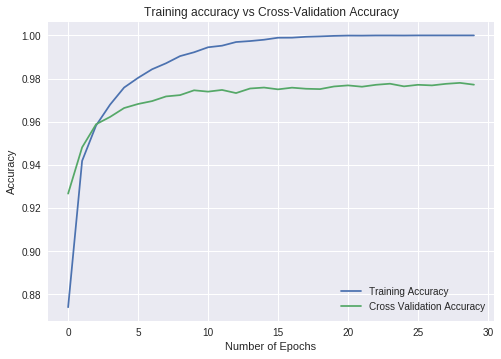

In [69]:
sns.set(style="darkgrid")
x_epoch = range(30)
plt.plot(x_epoch,training_accuracy)
plt.plot(x_epoch,cross_val_accuracy)
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training accuracy vs Cross-Validation Accuracy")
plt.legend(["Training Accuracy","Cross Validation Accuracy"])

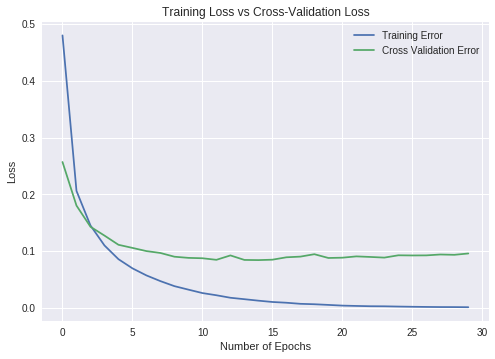

In [70]:
plt.plot(x_epoch,training_loss)
plt.plot(x_epoch,cross_val_loss)
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Cross-Validation Loss")
plt.legend(["Training Error","Cross Validation Error"])

In [71]:
test_loss, test_accuracy= classifier.evaluate(X_test_norm,y_test_norm,batch_size=100)
test_loss

10000/10000 [==============================] - 2s 204us/step


0.078482423902160009

In [72]:
test_accuracy

0.97890000700950619

In [73]:
y_test_pred = classifier.predict(X_test_norm)
y_test_pred = list(map(lambda i: np.argmax(i),y_test_pred))
y_test_pred

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 8,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 9,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 9,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 6,
 4,
 2,


**Plot Confusion Matrix against Test data**

In [74]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, y_test_pred)
confusionMatrix

array([[ 970,    0,    0,    2,    1,    1,    2,    1,    3,    0],
       [   0, 1126,    4,    0,    0,    1,    2,    0,    2,    0],
       [   4,    1, 1009,    3,    2,    0,    3,    5,    4,    1],
       [   1,    0,    1,  994,    0,    2,    0,    4,    5,    3],
       [   1,    0,    0,    1,  958,    1,    6,    2,    2,   11],
       [   2,    0,    0,    8,    1,  868,    5,    0,    5,    3],
       [   4,    4,    0,    1,    2,    5,  940,    0,    2,    0],
       [   1,    4,    8,    3,    1,    0,    0, 1002,    2,    7],
       [   4,    0,    6,    8,    5,    4,    2,    3,  938,    4],
       [   2,    4,    0,    6,    6,    4,    0,    3,    0,  984]])

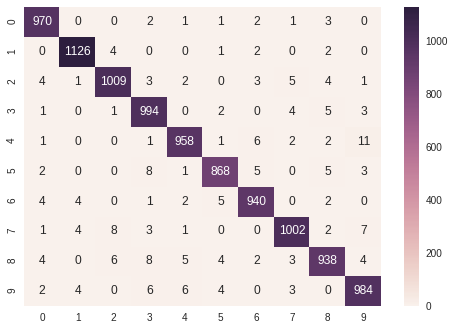

In [75]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [76]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

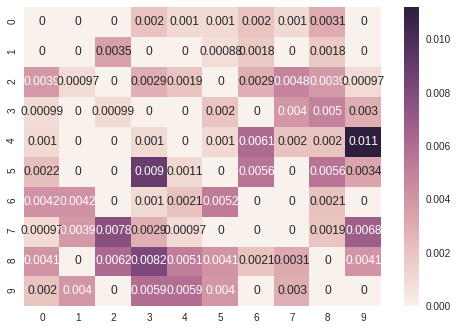

In [77]:
np.fill_diagonal(norm_conf_mx, 0)
ax = sns.heatmap(norm_conf_mx,annot=True)

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.97889999999999999

**One Hidden Layer Neural Network with sigmoid activation function **

**Initialize Neural Network**

In [79]:
classifier = Sequential()

**Add input layer & Hidden layer **


In [80]:
#classifier.add(Dense(output_dim=397,init='uniform',activation='relu',input_dim=784))
classifier.add(Dense(activation="relu",input_dim=784,units=397,kernel_initializer="uniform"))
#number of nodes in the hidden layer = avg(INNPUTLAYER + OUTPUTLAYER)
#classifier.add(Dense(activation="relu",units=397,kernel_initializer="uniform"))


In [81]:
#Adding output layer
classifier.add(Dense(activation="sigmoid",units=10,kernel_initializer="uniform"))


In [82]:
classifier.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [83]:
hist = classifier.fit(X_train_norm,y_train_norm,batch_size=250,epochs=15,verbose=1, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/15
42000/42000 [==============================] - 18s 418us/step - loss: 0.5409 - acc: 0.8685 - val_loss: 0.2704 - val_acc: 0.9228
Epoch 2/15
42000/42000 [==============================] - 18s 440us/step - loss: 0.2330 - acc: 0.9334 - val_loss: 0.2022 - val_acc: 0.9433
Epoch 3/15
42000/42000 [==============================] - 18s 440us/step - loss: 0.1693 - acc: 0.9520 - val_loss: 0.1682 - val_acc: 0.9528
Epoch 4/15
42000/42000 [==============================] - 19s 447us/step - loss: 0.1311 - acc: 0.9630 - val_loss: 0.1433 - val_acc: 0.9587
Epoch 5/15
42000/42000 [==============================] - 19s 457us/step - loss: 0.1082 - acc: 0.9685 - val_loss: 0.1264 - val_acc: 0.9637
Epoch 6/15
42000/42000 [==============================] - 19s 450us/step - loss: 0.0884 - acc: 0.9750 - val_loss: 0.1175 - val_acc: 0.9655
Epoch 7/15
42000/42000 [==============================] - 19s 453us/step - loss: 0.0749 - acc: 0.9787 - val_loss: 0.

In [84]:
training_accuracy = hist.history["acc"]
training_loss = hist.history["loss"]
cross_val_accuracy = hist.history["val_acc"]
cross_val_loss = hist.history["val_loss"]

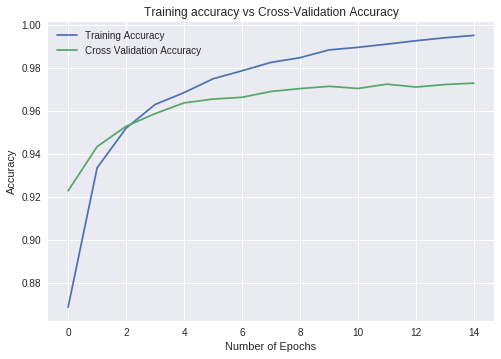

In [85]:
sns.set(style="darkgrid")
x_epoch = range(15)
plt.plot(x_epoch,training_accuracy)
plt.plot(x_epoch,cross_val_accuracy)
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training accuracy vs Cross-Validation Accuracy")
plt.legend(["Training Accuracy","Cross Validation Accuracy"])

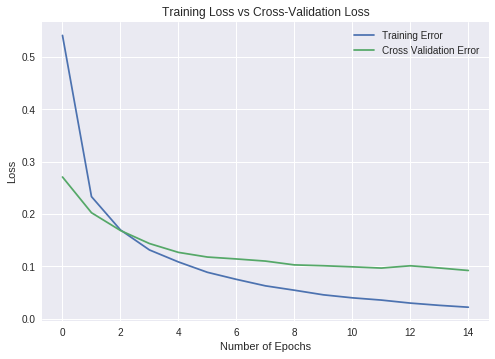

In [86]:
plt.plot(x_epoch,training_loss)
plt.plot(x_epoch,cross_val_loss)
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Cross-Validation Loss")
plt.legend(["Training Error","Cross Validation Error"])

In [87]:
test_loss, test_accuracy= classifier.evaluate(X_test_norm,y_test_norm,batch_size=100)
test_loss

10000/10000 [==============================] - 2s 203us/step


0.078061979949707164

In [88]:
test_accuracy

0.97700000584125524

In [89]:
y_test_pred = classifier.predict(X_test_norm)
y_test_pred = list(map(lambda i: np.argmax(i),y_test_pred))
y_test_pred

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 9,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 9,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 2,
 4,
 2,


**Plot Confusion Matrix against Test data**

In [90]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, y_test_pred)
confusionMatrix

array([[ 968,    0,    0,    2,    2,    2,    2,    1,    2,    1],
       [   0, 1121,    4,    0,    0,    1,    3,    1,    5,    0],
       [   4,    0, 1009,    2,    1,    0,    2,    6,    7,    1],
       [   0,    0,    3,  993,    0,    4,    0,    4,    4,    2],
       [   0,    0,    3,    1,  957,    1,    5,    2,    2,   11],
       [   4,    0,    0,    9,    1,  869,    4,    0,    3,    2],
       [   4,    3,    2,    1,    2,    5,  938,    0,    3,    0],
       [   1,    3,   13,    4,    1,    1,    0,  993,    4,    8],
       [   3,    0,    3,    6,    4,    5,    2,    2,  944,    5],
       [   2,    3,    0,    6,    8,    6,    0,    3,    3,  978]])

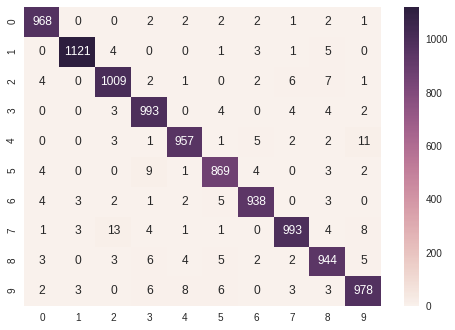

In [91]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [92]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

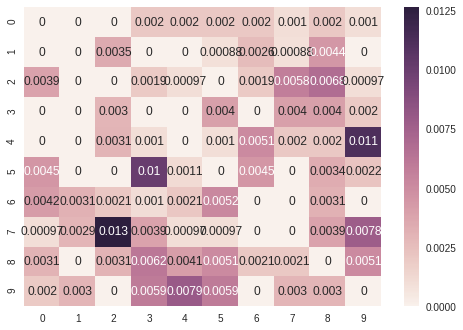

In [93]:
np.fill_diagonal(norm_conf_mx, 0)
ax = sns.heatmap(norm_conf_mx,annot=True)

In [94]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.97699999999999998

**One Hidden Layer Neural Network with tanh activation function **

**Initialize Neural Network**

In [32]:
classifier = Sequential()


**Add input layer & Hidden layer **


In [33]:
#classifier.add(Dense(output_dim=397,init='uniform',activation='relu',input_dim=784))
classifier.add(Dense(activation="relu",input_dim=784,units=397,kernel_initializer="uniform"))
#number of nodes in the hidden layer = avg(INNPUTLAYER + OUTPUTLAYER)
#classifier.add(Dense(activation="relu",units=397,kernel_initializer="uniform"))


In [34]:
#Adding output layer
classifier.add(Dense(activation="tanh",units=10,kernel_initializer="uniform"))


In [35]:
classifier.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [36]:
hist = classifier.fit(X_train_norm,y_train_norm,batch_size=250,epochs=15,verbose=1, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/15
42000/42000 [==============================] - 17s 415us/step - loss: 8.5630 - acc: 0.1188 - val_loss: 9.4058 - val_acc: 0.1182
Epoch 2/15
42000/42000 [==============================] - 17s 409us/step - loss: 9.5204 - acc: 0.1182 - val_loss: 9.8061 - val_acc: 0.1212
Epoch 3/15
42000/42000 [==============================] - 17s 415us/step - loss: 9.7772 - acc: 0.1199 - val_loss: 9.8061 - val_acc: 0.1212
Epoch 4/15
42000/42000 [==============================] - 19s 455us/step - loss: 9.7772 - acc: 0.1199 - val_loss: 9.8061 - val_acc: 0.1212
Epoch 5/15
42000/42000 [==============================] - 19s 454us/step - loss: 9.7772 - acc: 0.1199 - val_loss: 9.8061 - val_acc: 0.1212
Epoch 6/15
42000/42000 [==============================] - 19s 455us/step - loss: 9.7772 - acc: 0.1199 - val_loss: 9.8061 - val_acc: 0.1212
Epoch 7/15
42000/42000 [==============================] - 19s 463us/step - loss: 9.7772 - acc: 0.1199 - val_loss: 9.

In [37]:
training_accuracy = hist.history["acc"]
training_loss = hist.history["loss"]
cross_val_accuracy = hist.history["val_acc"]
cross_val_loss = hist.history["val_loss"]

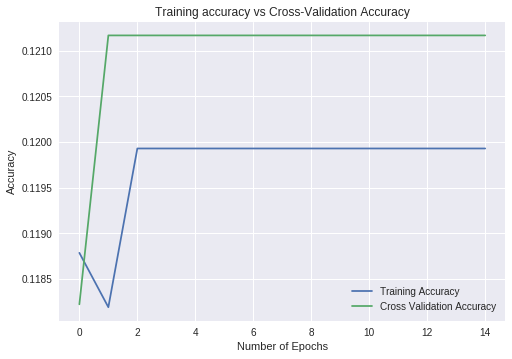

In [38]:
sns.set(style="darkgrid")
x_epoch = range(15)
plt.plot(x_epoch,training_accuracy)
plt.plot(x_epoch,cross_val_accuracy)
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training accuracy vs Cross-Validation Accuracy")
plt.legend(["Training Accuracy","Cross Validation Accuracy"])

In [42]:
test_loss, test_accuracy= classifier.evaluate(X_test_norm,y_test_norm,batch_size=100)
test_loss

10000/10000 [==============================] - 2s 211us/step


9.7917450904846195

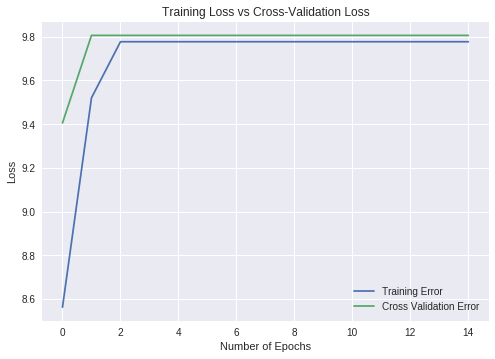

In [43]:
plt.plot(x_epoch,training_loss)
plt.plot(x_epoch,cross_val_loss)
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Cross-Validation Loss")
plt.legend(["Training Error","Cross Validation Error"])


In [44]:
test_accuracy

0.11810000050812959

In [45]:
y_test_pred = classifier.predict(X_test_norm)
y_test_pred = list(map(lambda i: np.argmax(i),y_test_pred))
y_test_pred

[8,
 8,
 8,
 5,
 5,
 8,
 5,
 5,
 5,
 9,
 5,
 9,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 8,
 6,
 9,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 9,
 5,
 5,
 5,
 9,
 5,
 5,
 5,
 5,
 9,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 9,
 5,
 5,
 8,
 5,
 8,
 5,
 9,
 5,
 5,
 9,
 5,
 9,
 9,
 5,
 5,
 5,
 5,
 5,
 9,
 5,
 5,
 5,
 9,
 5,
 9,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 9,
 5,
 6,
 9,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 5,
 5,
 9,
 5,
 5,
 5,
 9,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 8,
 5,
 9,
 8,
 5,
 9,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 9,
 6,
 8,
 5,
 8,
 5,
 9,
 9,
 5,
 5,
 5,
 5,
 8,
 5,
 5,
 9,
 5,
 5,
 5,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 5,
 5,
 8,
 5,
 5,
 5,
 9,
 5,
 9,
 8,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 8,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 9,
 5,
 8,
 5,
 5,
 5,
 8,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 9,
 5,
 5,
 5,
 5,
 9,
 9,
 8,
 5,
 5,
 9,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 8,
 9,
 5,
 5,
 5,
 5,
 9,
 5,
 8,
 5,
 5,
 5,
 5,
 8,


**Plot Confusion Matrix against Test data**

In [46]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, y_test_pred)
confusionMatrix

array([[  0,   0,   0,   0,   0, 803,   4,   0,   6, 167],
       [  0,   0,   0,   0,   0, 516,   0,   0, 224, 395],
       [  0,   0,   0,   0,   0, 582,   6,   0, 344, 100],
       [  0,   0,   0,  11,   0, 932,   1,   0,  24,  42],
       [  0,   0,   0,   0,   0, 745,   3,   0,  53, 181],
       [  0,   0,   0,   0,   0, 758,   2,   0,  64,  68],
       [  0,   0,   0,   0,   0, 626, 221,   0,  27,  84],
       [  0,   0,   0,   0,   0, 646,   0,   0,  54, 328],
       [  0,   0,   0,   0,   0, 851,   0,   0,  55,  68],
       [  0,   0,   0,   0,   0, 858,   0,   0,  15, 136]])

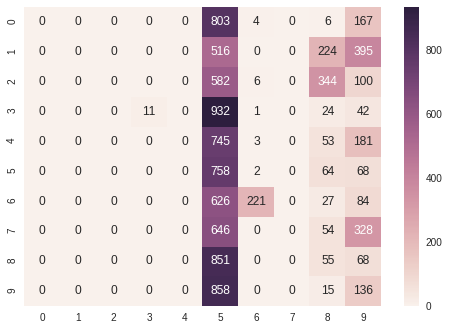

In [47]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [48]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

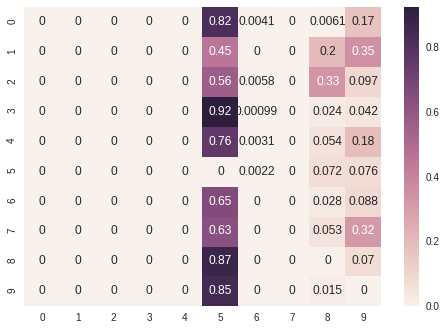

In [49]:
np.fill_diagonal(norm_conf_mx, 0)
ax = sns.heatmap(norm_conf_mx,annot=True)

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.1181

**Evaluate the performance against size of the training data of size 50000**

** Normalize the input set to be between 0 to 1 **

In [117]:
from sklearn.utils import shuffle
X_shuffle,y_shuffle = shuffle(X_train,y_train)
X_trunc = X_shuffle[0:50000]
y_trunc = y_shuffle[0:50000]
X_train_norm = X_trunc/255
X_test_norm = X_test/255
X_train_norm.shape

(50000, 784)

**Use One hot encoding for the y to convert it to a binary matrix** 

In [118]:
from keras.utils import np_utils
y_train_norm = np_utils.to_categorical(y_trunc)
y_test_norm = np_utils.to_categorical(y_test)

**Initialize Neural Network**

In [119]:
classifier = Sequential()

**Add input layer & Hidden layer **


In [120]:
#classifier.add(Dense(output_dim=397,init='uniform',activation='relu',input_dim=784))
classifier.add(Dense(activation="relu",input_dim=784,units=397,kernel_initializer="uniform"))
#number of nodes in the hidden layer = avg(INNPUTLAYER + OUTPUTLAYER)
#classifier.add(Dense(activation="relu",units=397,kernel_initializer="uniform"))


In [121]:
#Adding output layer
classifier.add(Dense(activation="softmax",units=10,kernel_initializer="uniform"))


In [122]:
classifier.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [123]:
hist = classifier.fit(X_train_norm,y_train_norm,batch_size=250,epochs=15,verbose=1, validation_split=0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/15
35000/35000 [==============================] - 15s 421us/step - loss: 0.5247 - acc: 0.8659 - val_loss: 0.2740 - val_acc: 0.9229
Epoch 2/15
35000/35000 [==============================] - 14s 404us/step - loss: 0.2240 - acc: 0.9358 - val_loss: 0.2105 - val_acc: 0.9389
Epoch 3/15
35000/35000 [==============================] - 14s 413us/step - loss: 0.1638 - acc: 0.9534 - val_loss: 0.1705 - val_acc: 0.9500
Epoch 4/15
35000/35000 [==============================] - 14s 413us/step - loss: 0.1267 - acc: 0.9641 - val_loss: 0.1457 - val_acc: 0.9582
Epoch 5/15
35000/35000 [==============================] - 15s 419us/step - loss: 0.1014 - acc: 0.9705 - val_loss: 0.1308 - val_acc: 0.9614
Epoch 6/15
35000/35000 [==============================] - 16s 461us/step - loss: 0.0823 - acc: 0.9771 - val_loss: 0.1212 - val_acc: 0.9647
Epoch 7/15
35000/35000 [==============================] - 15s 416us/step - loss: 0.0681 - acc: 0.9813 - val_loss: 0.

In [124]:
training_accuracy = hist.history["acc"]
training_loss = hist.history["loss"]
cross_val_accuracy = hist.history["val_acc"]
cross_val_loss = hist.history["val_loss"]

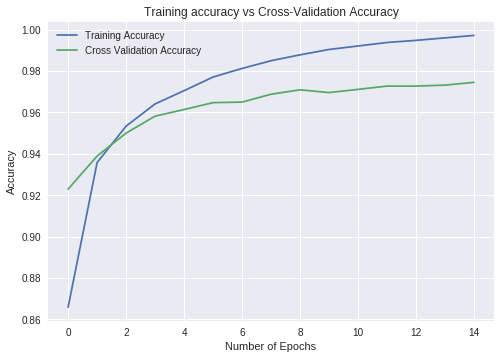

In [125]:
sns.set(style="darkgrid")
x_epoch = range(15)
plt.plot(x_epoch,training_accuracy)
plt.plot(x_epoch,cross_val_accuracy)
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training accuracy vs Cross-Validation Accuracy")
plt.legend(["Training Accuracy","Cross Validation Accuracy"])

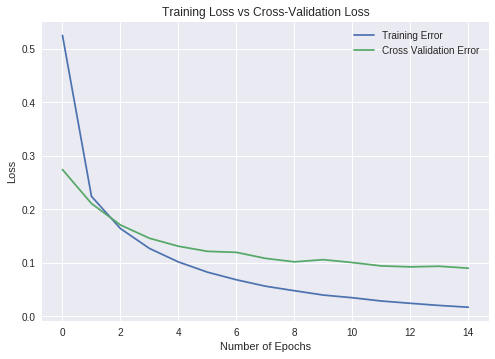

In [126]:
plt.plot(x_epoch,training_loss)
plt.plot(x_epoch,cross_val_loss)
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Cross-Validation Loss")
plt.legend(["Training Error","Cross Validation Error"])

In [127]:
test_loss, test_accuracy= classifier.evaluate(X_test_norm,y_test_norm,batch_size=100)
test_loss

10000/10000 [==============================] - 2s 190us/step


0.077262841043120714

In [128]:
test_accuracy

0.97590000510215758

In [129]:
y_test_pred = classifier.predict(X_test_norm)
y_test_pred = list(map(lambda i: np.argmax(i),y_test_pred))
y_test_pred

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 6,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 2,
 4,
 2,


**Plot Confusion Matrix against Test data**

In [130]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, y_test_pred)
confusionMatrix

array([[ 967,    0,    1,    1,    2,    2,    2,    1,    3,    1],
       [   0, 1124,    3,    1,    0,    1,    4,    0,    2,    0],
       [   4,    2, 1009,    1,    2,    0,    3,    4,    7,    0],
       [   0,    1,    3,  988,    1,    2,    0,    7,    4,    4],
       [   3,    0,    3,    1,  960,    0,    3,    3,    1,    8],
       [   3,    0,    0,   11,    2,  864,    6,    2,    3,    1],
       [   5,    3,    2,    1,    3,    3,  935,    1,    5,    0],
       [   0,    5,    9,    3,    0,    0,    0, 1005,    0,    6],
       [   3,    1,    6,    8,    5,    7,    1,    6,  933,    4],
       [   3,    5,    0,    5,   11,    1,    0,    6,    4,  974]])

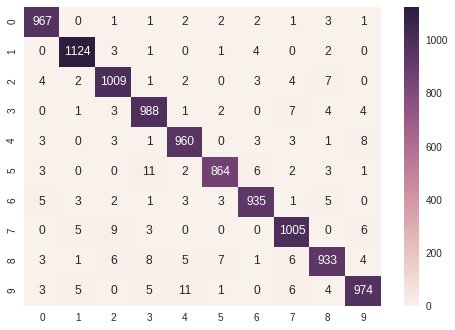

In [131]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [132]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

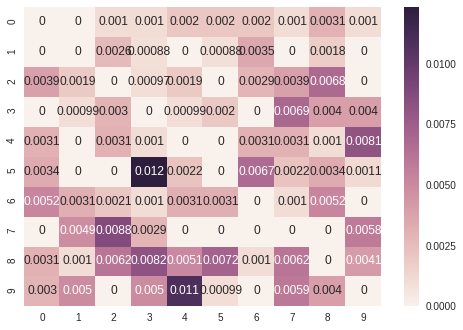

In [133]:
np.fill_diagonal(norm_conf_mx, 0)
ax = sns.heatmap(norm_conf_mx,annot=True)

In [134]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.97589999999999999

**Evaluate the performance against size of the training data of size 30000**

** Normalize the input set to be between 0 to 1 **

In [135]:
from sklearn.utils import shuffle
X_shuffle,y_shuffle = shuffle(X_train,y_train)
X_trunc = X_shuffle[0:30000]
y_trunc = y_shuffle[0:30000]
X_train_norm = X_trunc/255
X_test_norm = X_test/255
X_train_norm.shape

(30000, 784)

**Use One hot encoding for the y to convert it to a binary matrix** 

In [136]:
from keras.utils import np_utils
y_train_norm = np_utils.to_categorical(y_trunc)
y_test_norm = np_utils.to_categorical(y_test)

**Initialize Neural Network**

In [137]:
classifier = Sequential()

**Add input layer & Hidden layer **


In [138]:
#classifier.add(Dense(output_dim=397,init='uniform',activation='relu',input_dim=784))
classifier.add(Dense(activation="relu",input_dim=784,units=397,kernel_initializer="uniform"))
#number of nodes in the hidden layer = avg(INNPUTLAYER + OUTPUTLAYER)
#classifier.add(Dense(activation="relu",units=397,kernel_initializer="uniform"))


In [139]:
#Adding output layer
classifier.add(Dense(activation="softmax",units=10,kernel_initializer="uniform"))


In [140]:
classifier.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [141]:
hist = classifier.fit(X_train_norm,y_train_norm,batch_size=250,epochs=15,verbose=1, validation_split=0.3)

Train on 21000 samples, validate on 9000 samples
Epoch 1/15
21000/21000 [==============================] - 8s 393us/step - loss: 0.6595 - acc: 0.8392 - val_loss: 0.3449 - val_acc: 0.9029
Epoch 2/15
21000/21000 [==============================] - 8s 396us/step - loss: 0.2744 - acc: 0.9247 - val_loss: 0.2795 - val_acc: 0.9218
Epoch 3/15
21000/21000 [==============================] - 8s 402us/step - loss: 0.2131 - acc: 0.9403 - val_loss: 0.2313 - val_acc: 0.9318
Epoch 4/15
21000/21000 [==============================] - 9s 408us/step - loss: 0.1729 - acc: 0.9518 - val_loss: 0.1991 - val_acc: 0.9426
Epoch 5/15
21000/21000 [==============================] - 9s 408us/step - loss: 0.1414 - acc: 0.9604 - val_loss: 0.1811 - val_acc: 0.9462
Epoch 6/15
21000/21000 [==============================] - 9s 406us/step - loss: 0.1167 - acc: 0.9679 - val_loss: 0.1646 - val_acc: 0.9552
Epoch 7/15
21000/21000 [==============================] - 9s 419us/step - loss: 0.1009 - acc: 0.9729 - val_loss: 0.1522 - v

In [142]:
training_accuracy = hist.history["acc"]
training_loss = hist.history["loss"]
cross_val_accuracy = hist.history["val_acc"]
cross_val_loss = hist.history["val_loss"]

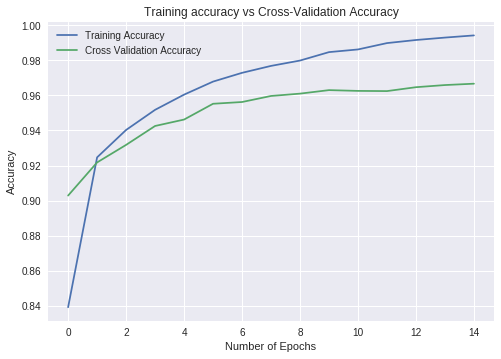

In [143]:
sns.set(style="darkgrid")
x_epoch = range(15)
plt.plot(x_epoch,training_accuracy)
plt.plot(x_epoch,cross_val_accuracy)
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training accuracy vs Cross-Validation Accuracy")
plt.legend(["Training Accuracy","Cross Validation Accuracy"])

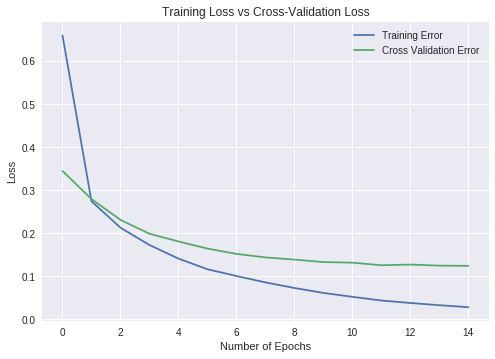

In [144]:
plt.plot(x_epoch,training_loss)
plt.plot(x_epoch,cross_val_loss)
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Cross-Validation Loss")
plt.legend(["Training Error","Cross Validation Error"])

In [145]:
test_loss, test_accuracy= classifier.evaluate(X_test_norm,y_test_norm,batch_size=100)
test_loss

10000/10000 [==============================] - 2s 180us/step


0.10700419067667098

In [146]:
test_accuracy

0.96850000500679012

In [147]:
y_test_pred = classifier.predict(X_test_norm)
y_test_pred = list(map(lambda i: np.argmax(i),y_test_pred))
y_test_pred

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 6,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 4,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 8,
 8,
 7,
 2,
 3,
 0,
 2,
 4,
 2,


**Plot Confusion Matrix against Test data**

In [148]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, y_test_pred)
confusionMatrix

array([[ 968,    0,    2,    1,    2,    0,    3,    1,    3,    0],
       [   0, 1119,    5,    1,    0,    1,    3,    2,    4,    0],
       [   4,    3, 1007,    1,    4,    0,    3,    6,    4,    0],
       [   1,    1,    6,  981,    1,    3,    0,    7,    8,    2],
       [   1,    0,    3,    3,  950,    0,    6,    5,    2,   12],
       [   3,    2,    1,   23,    3,  840,    9,    1,    8,    2],
       [   7,    3,    4,    0,    3,    6,  929,    1,    5,    0],
       [   0,    7,   14,    2,    0,    1,    0, 1000,    0,    4],
       [   4,    1,    5,   13,    3,    4,    3,    3,  936,    2],
       [   3,    6,    2,   14,   11,    3,    1,   12,    2,  955]])

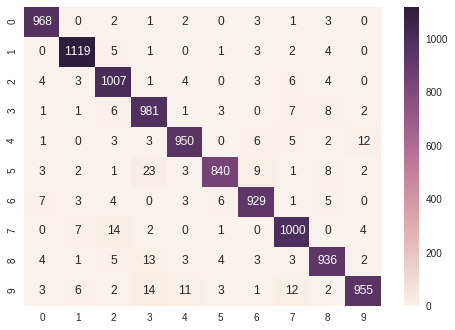

In [149]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [150]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

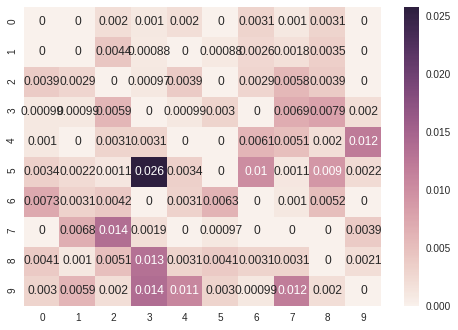

In [151]:
np.fill_diagonal(norm_conf_mx, 0)
ax = sns.heatmap(norm_conf_mx,annot=True)

In [152]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.96850000000000003